In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinv,null_space
from RateDistortion import *

In [2]:
R = np.array([[2,0],[1,1]])
S2 = np.array([[0.9,0.1],[0.1,0.9]])
S3 = np.array([[0.6,0.4],[0.4,0.6]])
px = np.array([0.8,0.2])

In [3]:
dxy2 = getFullDistortionFunction(R,S2)
r2 = getRD(px,dxy2,numPoints=4000)
dxy3 = getFullDistortionFunction(R,S3)
r3 = getRD(px,dxy3,numPoints=4000)

In [4]:
# A seed is set so that the results are reproducible
# Change the seed to see different random instances
g = np.random.default_rng(seed=1)

numPoints = 4000
opPoints = np.zeros((4,numPoints))
for i in range(numPoints):
  #aaa = 0.5*g.uniform()
  #bbb = 0.5*g.uniform()
  pygx = g.uniform(size=(2,2))
  for j in [0,1]:
    pygx[:,j] = pygx[:,j] / np.sum(pygx[:,j]) # columns must sum to 1
  pxy = pygx @ np.diag(px)

  opPoints[2,i] = np.sum(dxy2 * pxy)
  opPoints[3,i] = np.sum(dxy3 * pxy)
  opPoints[0,i] = MI(pxy)

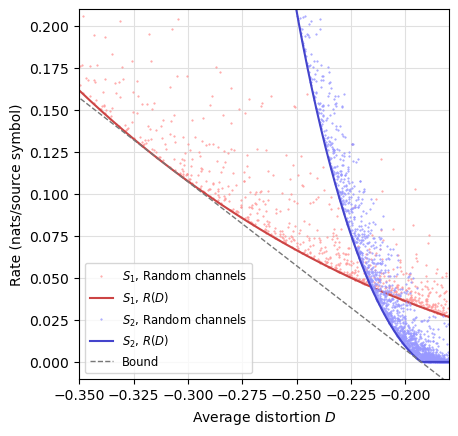

In [5]:
# line for the bound
dmin = -0.5
dmax = -0.1

Qinv = np.diag(inv(R) @ np.ones(np.shape(R)[0]))
Q = inv(Qinv)

L = getAvgLambdaStar(Q,px)
D_v = np.array([dmin,dmax])
B_v = hx(px) - D_v - L

plt.plot(opPoints[2,:],opPoints[0,:],linestyle='',
         marker='.',markersize=1,color='#ff9999',label='$S_1$, Random channels')
plt.plot(r2['Dmax_v'],r2['r_v'],linestyle='-',
         color='#cc4444',label='$S_1$, $R(D)$')

plt.plot(opPoints[3,:],opPoints[0,:],linestyle='',
         marker='.',markersize=1,color='#9999ff',label='$S_2$, Random channels')
plt.plot(r3['Dmax_v'],r3['r_v'],linestyle='-',
         color='#4444cc',label='$S_2$, $R(D)$')

plt.plot(D_v,B_v,linestyle='--',linewidth=1,color='#777777',label='Bound')

plt.xlabel('Average distortion $D$')
plt.ylabel('Rate (nats/source symbol)')
plt.axis([-0.35,-0.18,-0.01,0.21])


plt.legend(fontsize='small')

plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.gca().grid(visible=True,color='#e0e0e0')

plt.savefig('Figure6.pdf',bbox_inches='tight')